# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

In [36]:
cities

['cape town',
 'albany',
 'konstancin-jeziorna',
 'fevralsk',
 'barrow',
 'vaitupu',
 'qaanaaq',
 'port elizabeth',
 'strezhevoy',
 'saldanha',
 'bredasdorp',
 'bengkulu',
 'la primavera',
 'kupino',
 'port alfred',
 'jamestown',
 'cayenne',
 'beloha',
 'hermanus',
 'klaksvik',
 'vaini',
 'roma',
 'bethel',
 'labuan',
 'jiayuguan',
 'inhambane',
 'georgetown',
 'avarua',
 'rikitea',
 'mandurah',
 'xinpu',
 'ligayan',
 'kanepi',
 'punta arenas',
 'saint-philippe',
 'mecca',
 'mataura',
 'irituia',
 'hasaki',
 'sao joaquim',
 'magburaka',
 'tasiilaq',
 'nemuro',
 'hobart',
 'hithadhoo',
 'daxian',
 'taolanaro',
 'aswan',
 'lulea',
 'illoqqortoormiut',
 'chulman',
 'iquique',
 'iralaya',
 'nayudupeta',
 'tadine',
 'longyearbyen',
 'grootfontein',
 'peleduy',
 'new norfolk',
 'ushuaia',
 'kara-tyube',
 'ndele',
 'east london',
 'necochea',
 'mar del plata',
 'zhigansk',
 'nador',
 'gongzhuling',
 'tiarei',
 'ponta do sol',
 'zaliztsi',
 'puerto ayora',
 'tuktoyaktuk',
 'dikson',
 'simao',


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

In [47]:
city_weath = requests.get(city_url).json()
city_weath

{'coord': {'lon': 147.88, 'lat': 45.23},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 26.73,
  'feels_like': 15.98,
  'temp_min': 26.73,
  'temp_max': 26.73,
  'pressure': 1007,
  'humidity': 81,
  'sea_level': 1007,
  'grnd_level': 990},
 'wind': {'speed': 10.51, 'deg': 63},
 'clouds': {'all': 100},
 'dt': 1584217553,
 'sys': {'country': 'RU', 'sunrise': 1584217278, 'sunset': 1584260019},
 'timezone': 36000,
 'id': 2123979,
 'name': "Kuril'sk",
 'cod': 200}

In [42]:
city_loc = []
city_counter = 1
city_set = 1

#loop through city list(count=creating set)
for count,ele in enumerate(cities): 
    print (count,ele)
    #grouping the cities in sets of 50.
    if (count % 50 == 0 and count >= 50):
        city_set += 1
        city_counter = 0

        
    #adding to the end of the url(ele=city names)
    city_url = url + "&q=" + ele
    print("Processing Record %s of Set %s | %s" % (city_counter, city_set, ele))
    
    #increase city counter
    city_counter += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weath = requests.get(city_url).json()
        
        #country, lon, lat, temp, humidity, cloud factor, wind, date
        country= city_weath["sys"]["country"]
        date= city_weath["dt"]
        lon= city_weath["coord"]["lon"]
        lat= city_weath["coord"]["lat"]
        temp = city_weath["main"]["temp_max"]
        humidity = city_weath["main"]["humidity"]
        cloud_factor = city_weath["clouds"]["all"]
        wind = city_weath["wind"]["speed"]
        
        #append info above into a dict.
        
        city_loc.append({"City":ele,
                        "Country":country,
                        "Date":date,
                        "Longitude":lon,
                        "Latitude":lat,
                        "Max Temperature":temp,
                        "Humidity": humidity,
                        "Cloudiness": cloud_factor,
                        "Wind speed": wind})
        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
    



0 cape town
Processing Record 1 of Set 1 | cape town
1 albany
Processing Record 2 of Set 1 | albany
2 konstancin-jeziorna
Processing Record 3 of Set 1 | konstancin-jeziorna
3 fevralsk
Processing Record 4 of Set 1 | fevralsk
City not found. Skipping...
4 barrow
Processing Record 5 of Set 1 | barrow
5 vaitupu
Processing Record 6 of Set 1 | vaitupu
City not found. Skipping...
6 qaanaaq
Processing Record 7 of Set 1 | qaanaaq
7 port elizabeth
Processing Record 8 of Set 1 | port elizabeth
8 strezhevoy
Processing Record 9 of Set 1 | strezhevoy
9 saldanha
Processing Record 10 of Set 1 | saldanha
10 bredasdorp
Processing Record 11 of Set 1 | bredasdorp
11 bengkulu
Processing Record 12 of Set 1 | bengkulu
12 la primavera
Processing Record 13 of Set 1 | la primavera
13 kupino
Processing Record 14 of Set 1 | kupino
14 port alfred
Processing Record 15 of Set 1 | port alfred
15 jamestown
Processing Record 16 of Set 1 | jamestown
16 cayenne
Processing Record 17 of Set 1 | cayenne
17 beloha
Processing

149 levelland
Processing Record 49 of Set 3 | levelland
150 provideniya
Processing Record 0 of Set 4 | provideniya
151 vanimo
Processing Record 1 of Set 4 | vanimo
152 prince rupert
Processing Record 2 of Set 4 | prince rupert
153 bougouni
Processing Record 3 of Set 4 | bougouni
154 benghazi
Processing Record 4 of Set 4 | benghazi
155 kruisfontein
Processing Record 5 of Set 4 | kruisfontein
156 salalah
Processing Record 6 of Set 4 | salalah
157 kaitangata
Processing Record 7 of Set 4 | kaitangata
158 esil
Processing Record 8 of Set 4 | esil
159 axim
Processing Record 9 of Set 4 | axim
160 cherskiy
Processing Record 10 of Set 4 | cherskiy
161 abu jubayhah
Processing Record 11 of Set 4 | abu jubayhah
City not found. Skipping...
162 manggar
Processing Record 12 of Set 4 | manggar
163 kaeo
Processing Record 13 of Set 4 | kaeo
164 chuy
Processing Record 14 of Set 4 | chuy
165 rach gia
Processing Record 15 of Set 4 | rach gia
166 bluff
Processing Record 16 of Set 4 | bluff
167 methoni
Proces

295 dalmeny
Processing Record 45 of Set 6 | dalmeny
296 sao filipe
Processing Record 46 of Set 6 | sao filipe
297 dongsheng
Processing Record 47 of Set 6 | dongsheng
298 hualmay
Processing Record 48 of Set 6 | hualmay
299 aykhal
Processing Record 49 of Set 6 | aykhal
300 duyun
Processing Record 0 of Set 7 | duyun
301 isoka
Processing Record 1 of Set 7 | isoka
302 taltal
Processing Record 2 of Set 7 | taltal
303 sioux lookout
Processing Record 3 of Set 7 | sioux lookout
304 ngunguru
Processing Record 4 of Set 7 | ngunguru
305 ahipara
Processing Record 5 of Set 7 | ahipara
306 nanortalik
Processing Record 6 of Set 7 | nanortalik
307 vao
Processing Record 7 of Set 7 | vao
308 kikwit
Processing Record 8 of Set 7 | kikwit
309 tabiauea
Processing Record 9 of Set 7 | tabiauea
City not found. Skipping...
310 tessalit
Processing Record 10 of Set 7 | tessalit
311 labutta
Processing Record 11 of Set 7 | labutta
City not found. Skipping...
312 abha
Processing Record 12 of Set 7 | abha
313 constitu

441 kibaya
Processing Record 41 of Set 9 | kibaya
442 kieta
Processing Record 42 of Set 9 | kieta
443 mabaruma
Processing Record 43 of Set 9 | mabaruma
444 mahon
Processing Record 44 of Set 9 | mahon
445 yakeshi
Processing Record 45 of Set 9 | yakeshi
446 esperance
Processing Record 46 of Set 9 | esperance
447 goderich
Processing Record 47 of Set 9 | goderich
448 yokadouma
Processing Record 48 of Set 9 | yokadouma
449 eyl
Processing Record 49 of Set 9 | eyl
450 rock sound
Processing Record 0 of Set 10 | rock sound
451 bandarbeyla
Processing Record 1 of Set 10 | bandarbeyla
452 kawalu
Processing Record 2 of Set 10 | kawalu
453 kadoma
Processing Record 3 of Set 10 | kadoma
454 reconquista
Processing Record 4 of Set 10 | reconquista
455 port macquarie
Processing Record 5 of Set 10 | port macquarie
456 nome
Processing Record 6 of Set 10 | nome
457 ishigaki
Processing Record 7 of Set 10 | ishigaki
458 mehamn
Processing Record 8 of Set 10 | mehamn
459 eureka
Processing Record 9 of Set 10 | e

586 opobo
Processing Record 36 of Set 12 | opobo
City not found. Skipping...
587 hanmer springs
Processing Record 37 of Set 12 | hanmer springs
588 nyaunglebin
Processing Record 38 of Set 12 | nyaunglebin
589 montego bay
Processing Record 39 of Set 12 | montego bay
590 baliton
Processing Record 40 of Set 12 | baliton
591 codrington
Processing Record 41 of Set 12 | codrington
592 longlac
Processing Record 42 of Set 12 | longlac
City not found. Skipping...
593 rudsar
Processing Record 43 of Set 12 | rudsar
594 wilmington
Processing Record 44 of Set 12 | wilmington
595 saleaula
Processing Record 45 of Set 12 | saleaula
City not found. Skipping...
596 kurilsk
Processing Record 46 of Set 12 | kurilsk


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
city_df = pd.DataFrame(city_loc)
city_df.head()

,City,Country,Date,Longitude,Latitude,Max Temperature,Humidity,Cloudiness,Wind speed
0,cape town,ZA,1584217443,18.42,-33.93,69.01,88,20,18.34
1,albany,US,1584217481,-73.97,42.60,46.00,48,40,18.34
2,konstancin-jeziorna,PL,1584217481,21.12,52.09,33.01,54,0,4.70
3,barrow,US,1584217481,-156.79,71.29,12.20,92,90,34.45
4,qaanaaq,GL,1584217482,-69.36,77.48,-20.25,61,0,5.26


In [48]:
# Extract relevant fields from the data frame
lats = city_df["Latitude"]
max_temps = city_df["Max Temperature"]
humidity = city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind speed"]

In [49]:
# Export the City_Data into a csv
city_df.to_csv(output_data_file, index_label="City_ID")
# Show Record Count
city_df.count()

City               548
Country            548
Date               548
Longitude          548
Latitude           548
Max Temperature    548
Humidity           548
Cloudiness         548
Wind speed         548
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Sales (Dollars)')

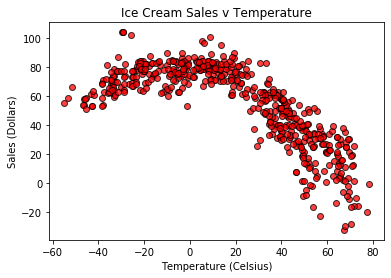

In [53]:
plt.scatter(lats, max_temps, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)
plt.title("Ice Cream Sales v Temperature")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Sales (Dollars)")

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression